# DON'T RUN THIS CODE 
i found the best (I think) hyperparameters and the results will change!

In [93]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import BinaryAccuracy
#ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
# Ottieni il percorso della cartella corrente del notebook
current_folder = os.getcwd()
# Trova il percorso della cartella root risalendo la gerarchia delle cartelle
root_folder = current_folder
while 'Project' not in os.listdir(root_folder):
    root_folder = os.path.dirname(root_folder)
# Visualizza il percorso della cartella root
print("Percorso della cartella root:", root_folder)

Percorso della cartella root: /home/af/a22/ML


# Input encoder for monk's and 1-hot-encoder

In [94]:
'''
# normalize the matrix (n.b.: the first column is the label)
# standardize data: ensure that the items will have a defined interval between dateset columns 
def monkScaled(matr):

    scaled_list = []
    # iter on columns 
    for i in range(1, 7):
        # extract the i-th column
        column = matr[:, i]
        
        # linear interpolation so that each value of a column is linearly distributed between 0 to the number of unique values (-1) in that column
        matr[:, i] = np.interp(column, (column.min(), column.max()), (0, len(np.unique(column)) - 1))

        # want the minimum number of bits when 1-hot-encode data
        col_categorical = to_categorical(matr[:, i])

        # define a numpy matrix
        if i != 1:
                scaled_list = np.concatenate((scaled_list, col_categorical), axis=1) #concatenate arrays along the 1 axes
        else: 
            scaled_list = col_categorical #return the array
        
    # input encoding for monk's problems    
    return scaled_list 


def oneHotEncoded(monk_number):

    train_file = "./ds/monks-{}.train".format(monk_number)
    test_file = "./ds/monks-{}.test".format(monk_number)

    # range up to 8 because there's a first blank space to be skipped
    train = np.loadtxt(train_file, delimiter=' ', usecols=range(1, 8))
    test = np.loadtxt(test_file, delimiter=' ', usecols=range(1, 8))

    # get target values
    y = train[:, 0]
    y_test = test[:, 0]

    # scale other values per column between 0 and # unique values for that column
    x = monkScaled(train)
    x_test = monkScaled(test)
    #x=train
    #x_test=test
    return x, y, x_test, y_test
    '''

'\n# normalize the matrix (n.b.: the first column is the label)\n# standardize data: ensure that the items will have a defined interval between dateset columns \ndef monkScaled(matr):\n\n    scaled_list = []\n    # iter on columns \n    for i in range(1, 7):\n        # extract the i-th column\n        column = matr[:, i]\n        \n        # linear interpolation so that each value of a column is linearly distributed between 0 to the number of unique values (-1) in that column\n        matr[:, i] = np.interp(column, (column.min(), column.max()), (0, len(np.unique(column)) - 1))\n\n        # want the minimum number of bits when 1-hot-encode data\n        col_categorical = to_categorical(matr[:, i])\n\n        # define a numpy matrix\n        if i != 1:\n                scaled_list = np.concatenate((scaled_list, col_categorical), axis=1) #concatenate arrays along the 1 axes\n        else: \n            scaled_list = col_categorical #return the array\n        \n    # input encoding for mon

In [95]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def oneHotEncoded(monk_number):

    train_file = "./ds/monks-{}.train".format(monk_number)
    test_file = "./ds/monks-{}.test".format(monk_number)

    # range up to 8 because there's a first blank space to be skipped
    train = np.loadtxt(train_file, delimiter=' ', usecols=range(1, 8))
    test = np.loadtxt(test_file, delimiter=' ', usecols=range(1, 8))

    # get target values
    y = train[:, 0]
    y_test = test[:, 0]

    # one-hot encode other values per column
    x = oneHotEncode(train[:, 1:])
    x_test = oneHotEncode(test[:, 1:])

    return x, y, x_test, y_test

def oneHotEncode(matrix):
    one_hot_encoded_list = []

    # iter on columns
    for i in range(matrix.shape[1]):
        # extract the i-th column
        column = matrix[:, i]

        # want the minimum number of bits when 1-hot-encode data
        col_categorical = to_categorical(column)

        # define a numpy matrix
        if i != 0:
            one_hot_encoded_list = np.concatenate((one_hot_encoded_list, col_categorical), axis=1)
        else:
            one_hot_encoded_list = col_categorical

    return one_hot_encoded_list


In [96]:
def monk_solver(monk_number, eta, alpha, epochs, lmb=None, batch_size=25, n_unit=4, seed=None):
    
    if seed is not None:
        np.random.seed(seed)
        import tensorflow as tf
        tf.random.set_seed(seed)
    # get data
    x, y, x_test, y_test = oneHotEncoded(monk_number)

    # create the model
    regularizer = l2(lmb) if lmb else None
    optimizer = SGD(learning_rate=eta, momentum=alpha)
    model = Sequential([
        Dense(n_unit, activation='tanh', kernel_regularizer=regularizer, input_dim=x.shape[1]), #input_dim=17
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[BinaryAccuracy(name='accuracy')])

    res = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

    # plot results for training set
    plt.plot(res.history['loss'])
    plt.plot(res.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend(['Loss TR', 'Loss TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Loss')
    #savePic(monk_number, eta, alpha, lmb)
    plt.show()

    # plot results for "test" (validation) set
    plt.plot(res.history['accuracy'])
    plt.plot(res.history['val_accuracy'])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(['Accuracy TR', 'Accuracy TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Accuracy')
    plt.show()
    return res 


Epoch 1/80
5/5 - 0s - loss: 0.2773 - accuracy: 0.5242 - val_loss: 0.2707 - val_accuracy: 0.5347 - 330ms/epoch - 66ms/step
Epoch 2/80
5/5 - 0s - loss: 0.2395 - accuracy: 0.5806 - val_loss: 0.2578 - val_accuracy: 0.5579 - 35ms/epoch - 7ms/step
Epoch 3/80
5/5 - 0s - loss: 0.2141 - accuracy: 0.6774 - val_loss: 0.2339 - val_accuracy: 0.6088 - 35ms/epoch - 7ms/step
Epoch 4/80
5/5 - 0s - loss: 0.1859 - accuracy: 0.7016 - val_loss: 0.2185 - val_accuracy: 0.6435 - 34ms/epoch - 7ms/step
Epoch 5/80
5/5 - 0s - loss: 0.1694 - accuracy: 0.7500 - val_loss: 0.2094 - val_accuracy: 0.6759 - 34ms/epoch - 7ms/step
Epoch 6/80
5/5 - 0s - loss: 0.1598 - accuracy: 0.7742 - val_loss: 0.2046 - val_accuracy: 0.6829 - 33ms/epoch - 7ms/step
Epoch 7/80
5/5 - 0s - loss: 0.1518 - accuracy: 0.7984 - val_loss: 0.1953 - val_accuracy: 0.7060 - 35ms/epoch - 7ms/step
Epoch 8/80
5/5 - 0s - loss: 0.1446 - accuracy: 0.7903 - val_loss: 0.1902 - val_accuracy: 0.7222 - 34ms/epoch - 7ms/step
Epoch 9/80
5/5 - 0s - loss: 0.1384 - a

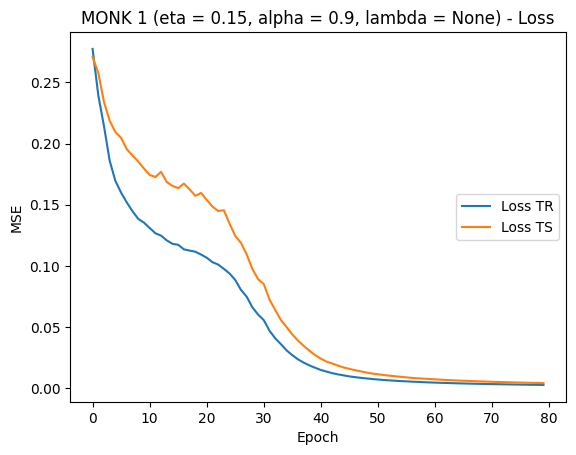

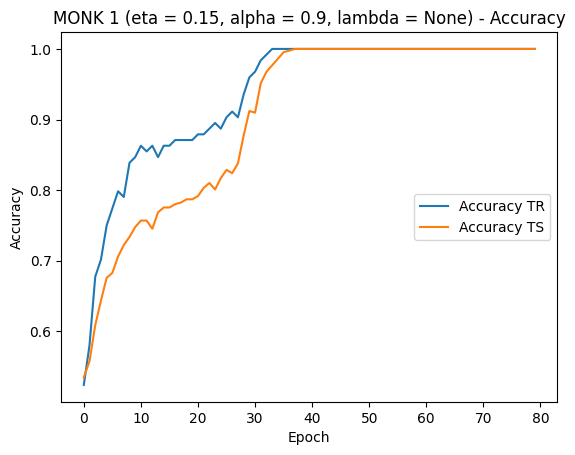

In [102]:
#monk_solver(monk_number=1, eta=0.18, alpha=0.84, epochs=80, seed=42) #this parameters are perfect (I think :D) dont'change them
#Best parameters: {'eta': 0.15, 'alpha': 0.9, 'epochs': 80}, Best Accuracy: 1.0
monk_solver(monk_number=1, eta=0.15, alpha=0.9, epochs=80, seed=42)

Epoch 1/80
7/7 - 0s - loss: 0.3066 - accuracy: 0.4024 - val_loss: 0.2360 - val_accuracy: 0.6204 - 346ms/epoch - 49ms/step
Epoch 2/80
7/7 - 0s - loss: 0.2554 - accuracy: 0.6095 - val_loss: 0.2302 - val_accuracy: 0.6713 - 35ms/epoch - 5ms/step
Epoch 3/80
7/7 - 0s - loss: 0.2520 - accuracy: 0.6213 - val_loss: 0.2227 - val_accuracy: 0.6713 - 36ms/epoch - 5ms/step
Epoch 4/80
7/7 - 0s - loss: 0.2378 - accuracy: 0.6095 - val_loss: 0.2296 - val_accuracy: 0.6227 - 37ms/epoch - 5ms/step
Epoch 5/80
7/7 - 0s - loss: 0.2317 - accuracy: 0.6036 - val_loss: 0.2294 - val_accuracy: 0.6319 - 41ms/epoch - 6ms/step
Epoch 6/80
7/7 - 0s - loss: 0.2286 - accuracy: 0.6331 - val_loss: 0.2228 - val_accuracy: 0.6690 - 34ms/epoch - 5ms/step
Epoch 7/80
7/7 - 0s - loss: 0.2267 - accuracy: 0.6095 - val_loss: 0.2197 - val_accuracy: 0.6644 - 35ms/epoch - 5ms/step
Epoch 8/80
7/7 - 0s - loss: 0.2262 - accuracy: 0.6213 - val_loss: 0.2211 - val_accuracy: 0.6667 - 37ms/epoch - 5ms/step
Epoch 9/80
7/7 - 0s - loss: 0.2231 - a

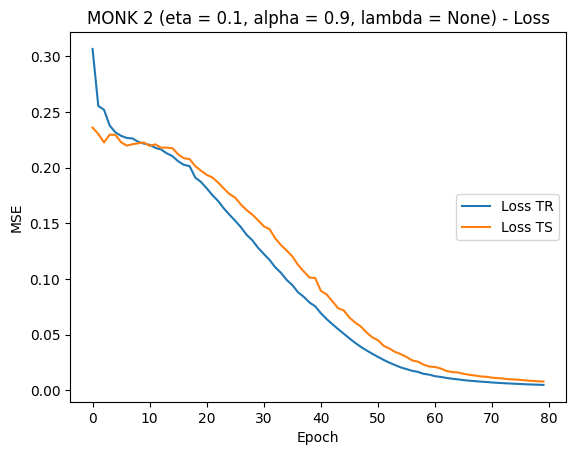

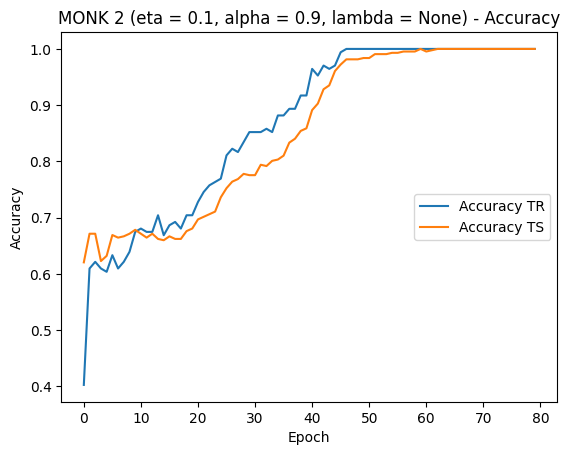

In [103]:
monk_solver(monk_number=2, eta=0.1, alpha=0.9, epochs=80) #idem for this
#Testing parameters: eta=0.1, alpha=0.95, epochs=100, seed=42
#Best parameters: {'eta': 0.1, 'alpha': 0.9, 'epochs': 80}, Best Accuracy: 1.0

In [99]:
'''
import itertools

def grid_search(monk_number, eta_values, alpha_values, epochs_values):
    best_accuracy = 0.0
    best_params = {}

    for eta, alpha, epochs in itertools.product(eta_values, alpha_values, epochs_values):
        print(f"Testing parameters: eta={eta}, alpha={alpha}, epochs={epochs}")

        # Run the solver with current parameters and capture the 'res' object
        res = monk_solver(monk_number, eta, alpha, epochs)

        # Update best parameters if accuracy improves
        if res.history['val_accuracy'][-1] > best_accuracy:
            best_accuracy = res.history['val_accuracy'][-1]
            best_params = {'eta': eta, 'alpha': alpha, 'epochs': epochs}

    print(f"Best parameters: {best_params}, Best Accuracy: {best_accuracy}")
    return best_params, best_accuracy

# ... (rest of the code)

# Define the parameter values to search
eta_values = [0.1, 0.15, 0.16, 0.17, 0.18, 0.19]
alpha_values = [0.5, 0.6, 0.9, 0.95]
epochs_values = [50, 80, 100]

# Perform grid search for Monk 3
best_params, best_accuracy = grid_search(2, eta_values, alpha_values, epochs_values)

print(f"\nBest parameters: {best_params}, Best Accuracy: {best_accuracy}")
'''

'\nimport itertools\n\ndef grid_search(monk_number, eta_values, alpha_values, epochs_values):\n    best_accuracy = 0.0\n    best_params = {}\n\n    for eta, alpha, epochs in itertools.product(eta_values, alpha_values, epochs_values):\n        print(f"Testing parameters: eta={eta}, alpha={alpha}, epochs={epochs}")\n\n        # Run the solver with current parameters and capture the \'res\' object\n        res = monk_solver(monk_number, eta, alpha, epochs)\n\n        # Update best parameters if accuracy improves\n        if res.history[\'val_accuracy\'][-1] > best_accuracy:\n            best_accuracy = res.history[\'val_accuracy\'][-1]\n            best_params = {\'eta\': eta, \'alpha\': alpha, \'epochs\': epochs}\n\n    print(f"Best parameters: {best_params}, Best Accuracy: {best_accuracy}")\n    return best_params, best_accuracy\n\n# ... (rest of the code)\n\n# Define the parameter values to search\neta_values = [0.1, 0.15, 0.16, 0.17, 0.18, 0.19]\nalpha_values = [0.5, 0.6, 0.9, 0.95]\n

Epoch 1/50
5/5 - 0s - loss: 0.3105 - accuracy: 0.4590 - val_loss: 0.2958 - val_accuracy: 0.4491 - 323ms/epoch - 65ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2929 - accuracy: 0.4918 - val_loss: 0.2782 - val_accuracy: 0.4699 - 34ms/epoch - 7ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2757 - accuracy: 0.5164 - val_loss: 0.2622 - val_accuracy: 0.5185 - 33ms/epoch - 7ms/step
Epoch 4/50
5/5 - 0s - loss: 0.2610 - accuracy: 0.5246 - val_loss: 0.2482 - val_accuracy: 0.5509 - 34ms/epoch - 7ms/step
Epoch 5/50
5/5 - 0s - loss: 0.2470 - accuracy: 0.5820 - val_loss: 0.2359 - val_accuracy: 0.5972 - 34ms/epoch - 7ms/step
Epoch 6/50
5/5 - 0s - loss: 0.2345 - accuracy: 0.6148 - val_loss: 0.2247 - val_accuracy: 0.6412 - 34ms/epoch - 7ms/step
Epoch 7/50
5/5 - 0s - loss: 0.2231 - accuracy: 0.6639 - val_loss: 0.2137 - val_accuracy: 0.6644 - 33ms/epoch - 7ms/step
Epoch 8/50
5/5 - 0s - loss: 0.2118 - accuracy: 0.6803 - val_loss: 0.2024 - val_accuracy: 0.7153 - 43ms/epoch - 9ms/step
Epoch 9/50
5/5 - 0s - loss: 0.2021 - a

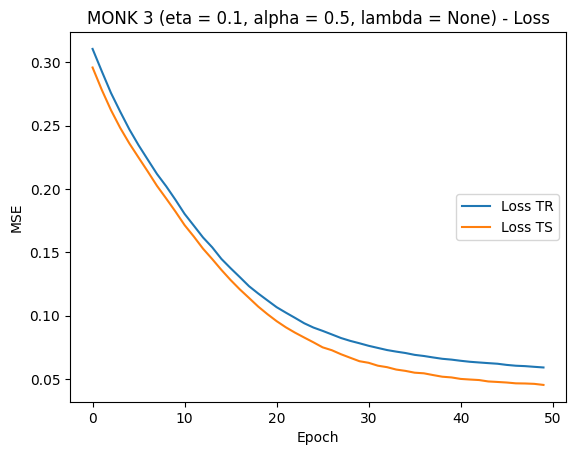

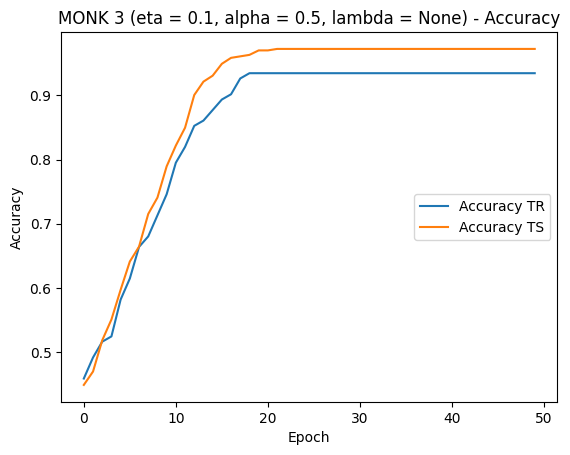

In [104]:
#monk3 this :loss: 0.0184 - accuracy: 0.9836 - val_loss: 0.0231 - val_accuracy: 0.9699 - 32ms/epoch with monk_number=3, eta=0.3, alpha=0.78, epochs=120
#monk_solver(monk_number=3, eta=0.15, alpha=0.3, epochs=80) # look nice: 5/5 - 0s - loss: 0.0248 - accuracy: 0.9836 - val_loss: 0.0241 - val_accuracy: 0.9699 - 31ms/epoch - 6ms/step

#Best parameters: {'eta': 0.1, 'alpha': 0.5, 'epochs': 50}, Best Accuracy: 0.9722222089767456
monk_solver(monk_number=3, eta=0.1, alpha=0.5, epochs=50)